<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/3_3_Unsupervised_Learning_in_Python_Decorrelating_Your_Data_and_Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-3 Unsupervised Learning in Python - Decorrelating Your Data and Dimension Reduction

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

## Data

In [2]:
data_base_url = 'https://drive.google.com/uc?id='

### Wine

In [3]:
id = '1mslRAnj9qdJfIqJpiVt8lSC3ygnfpzF-'
wine = pd.read_csv(data_base_url + id)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   class_name            178 non-null    object 
 2   alcohol               178 non-null    float64
 3   malic_acid            178 non-null    float64
 4   ash                   178 non-null    float64
 5   alcalinity_of_ash     178 non-null    float64
 6   magnesium             178 non-null    int64  
 7   total_phenols         178 non-null    float64
 8   flavanoids            178 non-null    float64
 9   nonflavanoid_phenols  178 non-null    float64
 10  proanthocyanins       178 non-null    float64
 11  color_intensity       178 non-null    float64
 12  hue                   178 non-null    float64
 13  od280                 178 non-null    float64
 14  proline               178 non-null    int64  
dtypes: float64(11), int64(3

### Grain data

In [4]:
id = '1-sfcYNfZ3bC2K5AesWHcDiPiqTo1S_ie'
seeds = pd.read_csv(data_base_url + id, header=None)
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


## Visualizing the PCA transformation

### Dimension reduction

- Finds patters in data and uses these patterns to re-express it in a compressed form
- More efficient storage and computation
- Reduces data to its "bare bones", discarding noisy features that cause big problems for prediction talks, like classification, regression

### Principle Component Analysis

- PCA
- Fundamental dimension reduction technique
  1. First step: **decorrelation** (this section)
  2. Second Step: reduces dimension (covered later)

### PCA aligns data with axes

- Rotates data samples to be aligned with axes
- Shifts data samples so they have mean 0

<img src='https://drive.google.com/uc?export=view&id=1E-0ouQxyNUGgRsbQXFmkQly8jKzF2ia0 '>

### PCA in `sklearn`

- The `fit()` method learns how to rotate and shift the samples
- The `transform()` method apples the transformation that fit learned
    - Can be applied to unseen data

In [5]:
samples = wine[['total_phenols', 'od280']]
print(samples.shape)
samples.info()

(178, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_phenols  178 non-null    float64
 1   od280          178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


In [6]:
samples = samples.to_numpy()

In [7]:
model = PCA()
model

PCA()

In [8]:
model.fit(samples)

PCA()

In [9]:
transformed_samples = model.transform(samples)

In [10]:
xs = samples[:, 0]
ys = samples[:, 1]
xs_t = transformed_samples[:, 0]
ys_t = transformed_samples[:, 1]

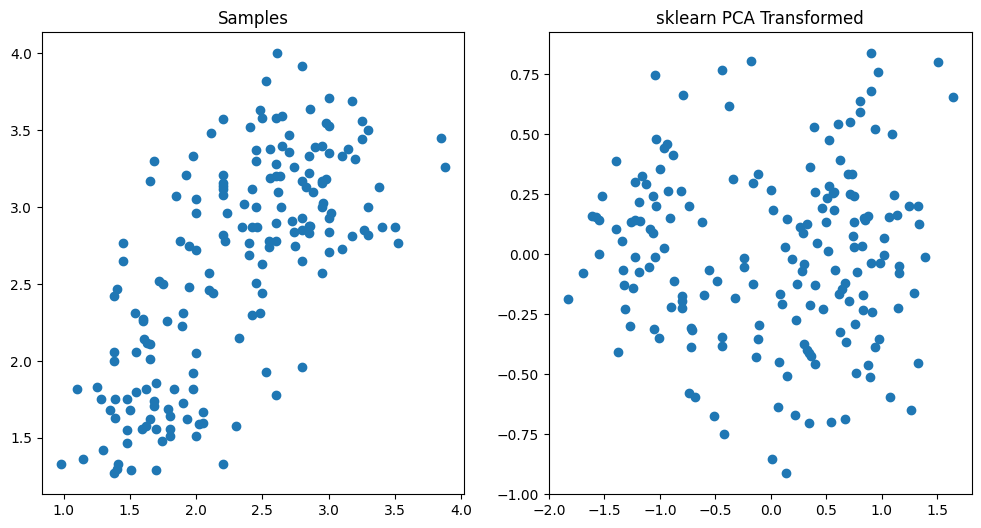

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(xs, ys)
axes[1].scatter(xs_t, ys_t)

axes[0].set_title('Samples')
axes[1].set_title('sklearn PCA Transformed')
plt.show()

### Doing it manually

Since no dimensions were removed, PCA is performing only a rotation and shift without reducing the number of features.

#### Step 1: Compute Mean Centring (Shift)

In [12]:
mean = np.mean(samples, axis=0)
mean

array([2.29511236, 2.61168539])

In [13]:
centred_samples = samples - mean

#### Step 2: Compute PCA Components (Eigenvectors)

In [14]:
cov_matrix = np.cov(centred_samples.T)
cov_matrix

array([[0.39168954, 0.31102128],
       [0.31102128, 0.50408641]])

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('eigen values: ', eigenvalues)
print('eigen vectors:\n')
eigenvectors

eigen values:  [0.13183022 0.76394572]
eigen vectors:



array([[-0.76740167, -0.64116665],
       [ 0.64116665, -0.76740167]])

In [16]:
sorted_indices = np.argsort(eigenvalues)
sorted_indices

array([0, 1])

In [17]:
eigenvectors = eigenvectors[:, sorted_indices]
eigenvectors

array([[-0.76740167, -0.64116665],
       [ 0.64116665, -0.76740167]])

In [18]:
manual_tranformed = np.dot(centred_samples, eigenvectors)

In [19]:
xs_m = manual_tranformed[:, 0]
ys_m = manual_tranformed[:, 1]

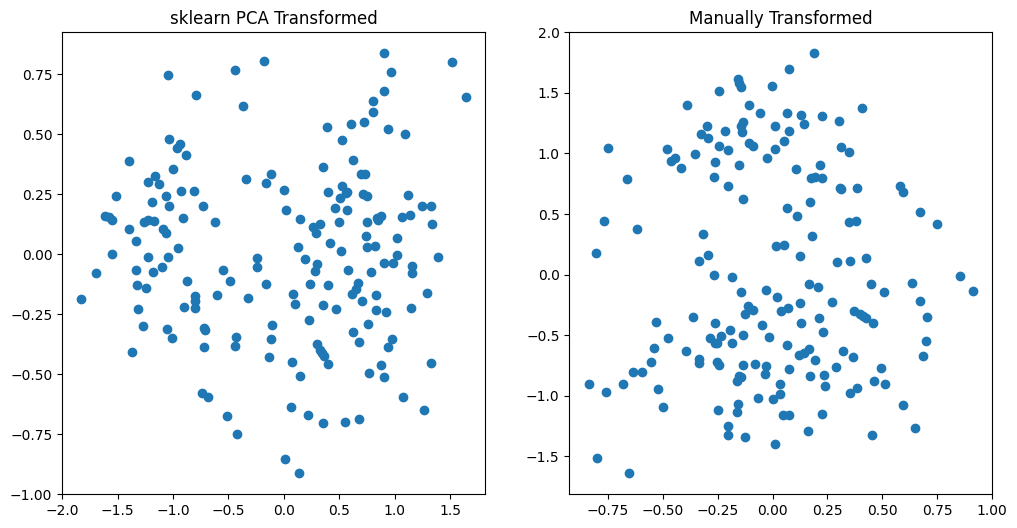

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(xs_t, ys_t)
axes[1].scatter(xs_m, ys_m)

axes[0].set_title('sklearn PCA Transformed')
axes[1].set_title('Manually Transformed')
plt.show()

####Why Might the Results Differ?

1.	Eigenvectors in PCA Can Have Flipped Signs
    - PCA eigenvectors (principal components) are unique only up to a sign flip.
	- If v is an eigenvector, then -v is also a valid eigenvector because both point in the same direction but have opposite signs.
	- `np.linalg.eig()` and Scikit-Learn’s `PCA` might choose different conventions for eigenvector orientation.
2.	Different Numerical Precision Handling
    - `np.linalg.eig()` vs. `scipy.linalg.eigh()` (which Scikit-Learn often uses internally) might produce slightly different numerical results.

In [21]:
model.components_

array([[ 0.64116665,  0.76740167],
       [ 0.76740167, -0.64116665]])

In [22]:
eigenvectors

array([[-0.76740167, -0.64116665],
       [ 0.64116665, -0.76740167]])

### PCA features are not correlated

- Features of a dataset are often correlated
- PCA aligns data with axes
- Resulting PCA features are not linearly correlated - **decorrelation**

In [23]:
pd.DataFrame(samples).corr().style.background_gradient(cmap='coolwarm',
                                                       vmin=-1,
                                                       vmax=1)

,0,1
0,1.000000,0.699949
1,0.699949,1.000000


In [24]:
pd.DataFrame(transformed_samples).corr().style.background_gradient(cmap='coolwarm',
                                                                   vmin=-1,
                                                                   vmax=1)

,0,1
0,1.000000,0.000000
1,0.000000,1.000000


In [25]:
pd.DataFrame(manual_tranformed).corr().style.background_gradient(cmap='coolwarm',
                                                                 vmin=-1,
                                                                 vmax=1)

,0,1
0,1.000000,0.000000
1,0.000000,1.000000


### Principle Components

- The **prinicipal components** are the directions in which the samples vary the most (red arrows below)
- PCA aligns the principal components with the coordinate axes
- After the model has been fit, thse components are available as the `model.components_` attribute

<img src='https://drive.google.com/uc?export=view&id=1YopNCJ_XTgtTGmkavq3eISWcH0BLnpbD'/>

### Correlated data in nature

In [26]:
grains = seeds[[4, 3]]
grains.columns = ['width', 'height']
grains

,width,height
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658
...,...,...
205,2.981,5.137
206,2.795,5.140
207,3.232,5.236
208,2.836,5.175


In [27]:
grains = grains.to_numpy()